https://www.kaggle.com/passnyc/data-science-for-good#2016%20School%20Explorer.csv

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [23]:
df = pd.read_csv('2016 School Explorer.csv')
df

,Adjusted Grade,New?,Other Location Code in LCGMS,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full),...,Grade 8 Math - All Students Tested,Grade 8 Math 4s - All Students,Grade 8 Math 4s - American Indian or Alaska Native,Grade 8 Math 4s - Black or African American,Grade 8 Math 4s - Hispanic or Latino,Grade 8 Math 4s - Asian or Pacific Islander,Grade 8 Math 4s - White,Grade 8 Math 4s - Multiracial,Grade 8 Math 4s - Limited English Proficient,Grade 8 Math 4s - Economically Disadvantaged
0,NaN,NaN,NaN,P.S. 015 ROBERTO CLEMENTE,310100010015,01M015,1,40.721834,-73.978766,"333 E 4TH ST NEW YORK, NY 10009",...,0,0,0,0,0,0,0,0,0,0
1,NaN,NaN,NaN,P.S. 019 ASHER LEVY,310100010019,01M019,1,40.729892,-73.984231,"185 1ST AVE NEW YORK, NY 10003",...,0,0,0,0,0,0,0,0,0,0
2,NaN,NaN,NaN,P.S. 020 ANNA SILVER,310100010020,01M020,1,40.721274,-73.986315,"166 ESSEX ST NEW YORK, NY 10002",...,0,0,0,0,0,0,0,0,0,0
3,NaN,NaN,NaN,P.S. 034 FRANKLIN D. ROOSEVELT,310100010034,01M034,1,40.726147,-73.975043,"730 E 12TH ST NEW YORK, NY 10009",...,48,1,0,0,0,0,0,0,0,0
4,NaN,NaN,NaN,THE STAR ACADEMY - P.S.63,310100010063,01M063,1,40.724404,-73.986360,"121 E 3RD ST NEW YORK, NY 10009",...,0,0,0,0,0,0,0,0,0,0
5,NaN,NaN,NaN,P.S. 064 ROBERT SIMON,310100010064,01M064,1,40.723747,-73.981602,"600 E 6TH ST NEW YORK, NY 10009",...,0,0,0,0,0,0,0,0,0,0
6,NaN,NaN,NaN,P.S. 110 FLORENCE NIGHTINGALE,310100010110,01M110,1,40.715293,-73.979927,"285 DELANCEY ST NEW YORK, NY 10002",...,0,0,0,0,0,0,0,0,0,0
7,NaN,NaN,NaN,P.S. 134 HENRIETTA SZOLD,310100010134,01M134,1,40.714301,-73.982966,"293 E BROADWAY NEW YORK, NY 10002",...,0,0,0,0,0,0,0,0,0,0
8,NaN,NaN,NaN,P.S. 140 NATHAN STRAUS,310100010140,01M140,1,40.719128,-73.983283,"123 RIDGE ST NEW YORK, NY 10002",...,61,2,0,0,1,0,0,0,0,1
9,NaN,NaN,NaN,P.S. 142 AMALIA CASTRO,310100010142,01M142,1,40.718230,-73.984082,"100 ATTORNEY ST NEW YORK, NY 10002",...,0,0,0,0,0,0,0,0,0,0


In [24]:
sns.set(style="darkgrid")

# Data Cleaning

In [25]:
# Sort values by District

df = df.sort_values(by = 'District')

# Clean "School income estimate" by removing all dollar symbols

df['School Income Estimate'] = df['School Income Estimate'].str.replace('$', '')

# Clean "School income estimate" by removing all commas

df['School Income Estimate'] = df['School Income Estimate'].str.replace(',', '')

# Remove all rows in "School Income Estimate" and "Economic Need Index" with NaN

df = df[pd.notnull(df['School Income Estimate'])]
df = df[pd.notnull(df['Economic Need Index'])]
df = df[pd.notnull(df['Rigorous Instruction Rating'])]
df = df[pd.notnull(df['Collaborative Teachers Rating'])]
df = df[pd.notnull(df['Supportive Environment Rating'])]
df = df[pd.notnull(df['Effective School Leadership Rating'])]
df = df[pd.notnull(df['Strong Family-Community Ties Rating'])]
df = df[pd.notnull(df['Trust Rating'])]
df = df[pd.notnull(df['Student Achievement Rating'])]



# Change all "School Income Estimate" types to Float

df['School Income Estimate'] = pd.to_numeric(df['School Income Estimate'])

# Change all Percents to Decimals and Floats

def p2f(x):
    return float(x.strip('%'))/100
df['Percent ELL'] = df['Percent ELL'].apply(p2f)
df['Percent Asian'] = df['Percent Asian'].apply(p2f)
df['Percent Black'] = df['Percent Black'].apply(p2f)
df['Percent Hispanic'] = df['Percent Hispanic'].apply(p2f)
df['Percent Black / Hispanic'] = df['Percent Black / Hispanic'].apply(p2f)
df['Percent White'] = df['Percent White'].apply(p2f)
df['Student Attendance Rate'] = df['Student Attendance Rate'].apply(p2f)
df['Percent of Students Chronically Absent'] = df['Percent of Students Chronically Absent'].apply(p2f)
df['Rigorous Instruction %'] = df['Rigorous Instruction %'].apply(p2f)
df['Collaborative Teachers %'] = df['Collaborative Teachers %'].apply(p2f)
df['Supportive Environment %'] = df['Supportive Environment %'].apply(p2f)
df['Effective School Leadership %'] = df['Effective School Leadership %'].apply(p2f)
df['Strong Family-Community Ties %'] = df['Strong Family-Community Ties %'].apply(p2f)
df['Trust %'] = df['Trust %'].apply(p2f)

# Change grading scale froom not, approaching, meeting and exceeding target to 0, 1, 2, 3 respectively.

mapping = {'Not Meeting Target': 0, 'Approaching Target': 1, 'Meeting Target': 2, 'Exceeding Target': 3}
df = df.replace({'Rigorous Instruction Rating': mapping, 'Collaborative Teachers Rating': mapping, 'Supportive Environment Rating': mapping, 'Effective School Leadership Rating': mapping, 'Strong Family-Community Ties Rating': mapping, 'Trust Rating': mapping, 'Student Achievement Rating': mapping})

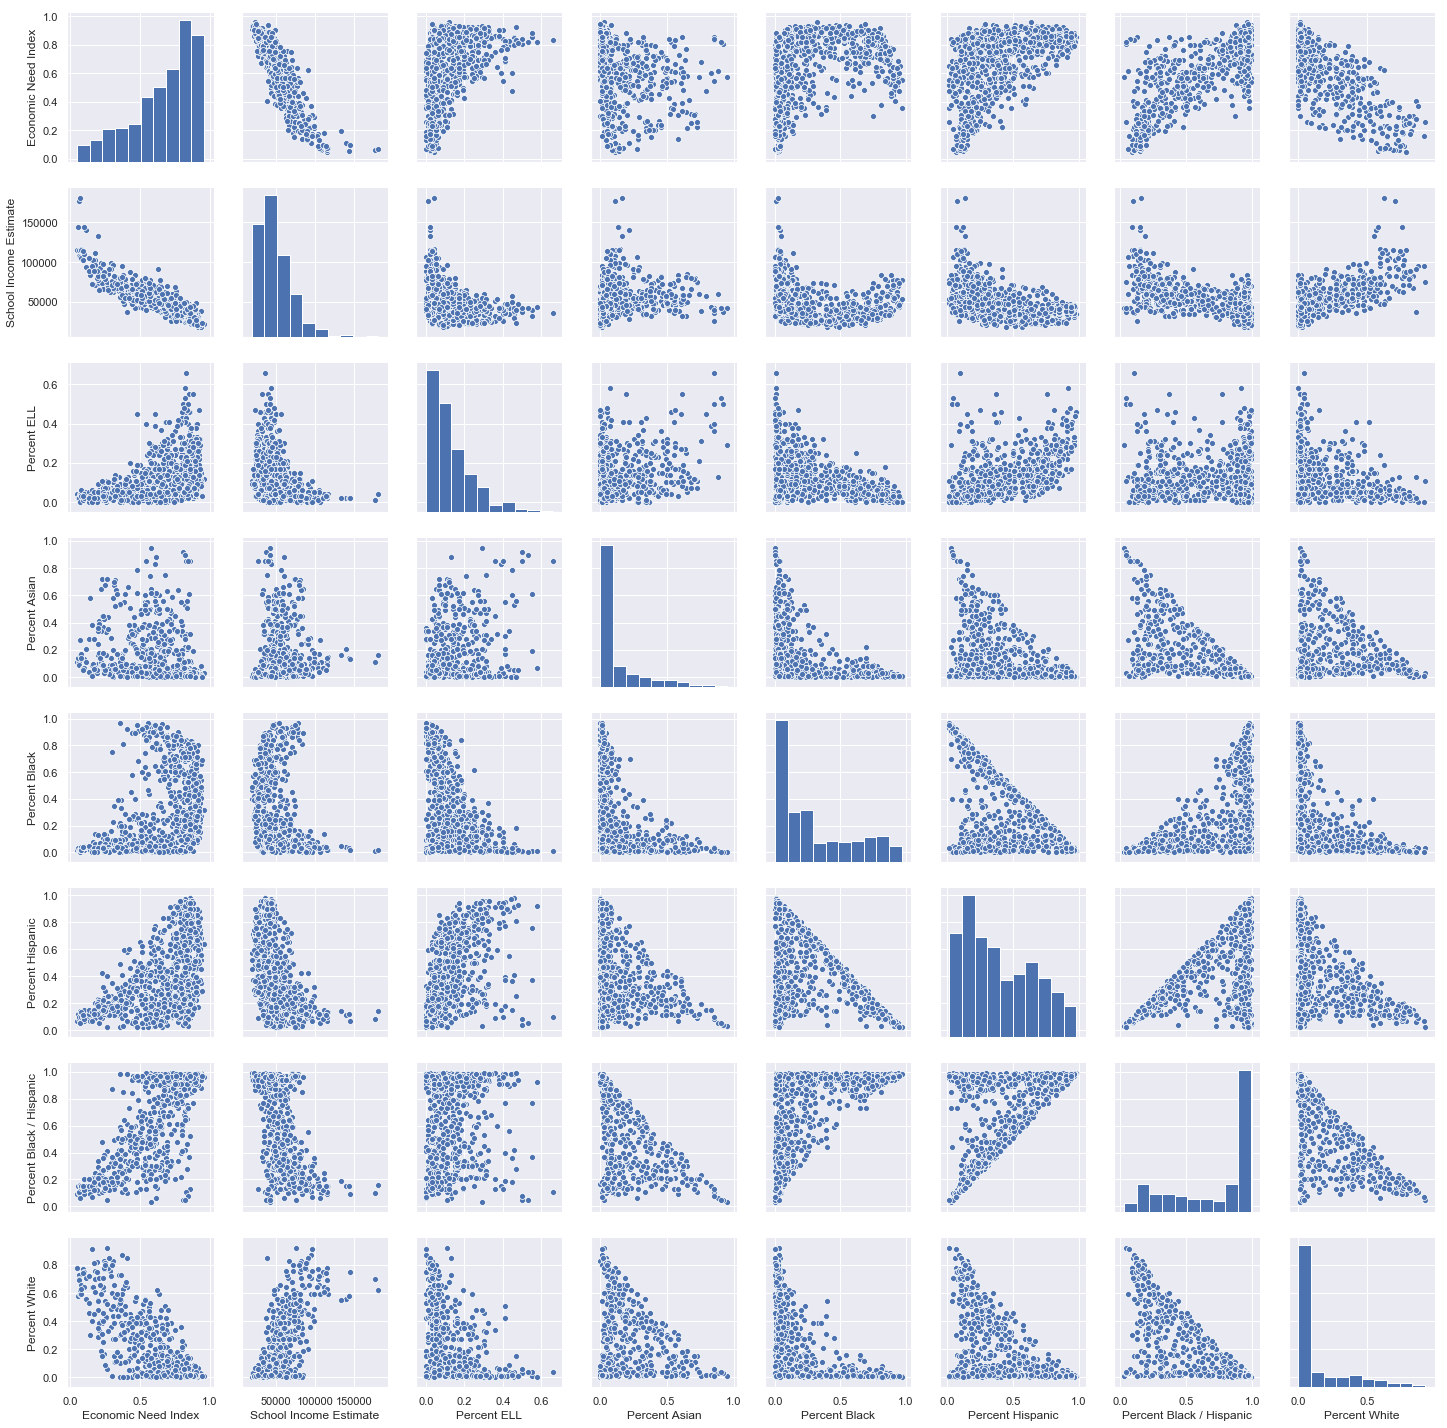

In [5]:
# Pair plot on Economic need Index against all continuous variables

g = sns.pairplot(df, vars=['Economic Need Index', 'School Income Estimate', 'Percent ELL', 'Percent Asian','Percent Black', 'Percent Hispanic', 'Percent Black / Hispanic', 'Percent White'])

In [6]:
student_demographic = df[['Economic Need Index', 'School Income Estimate', 'Percent ELL', 'Percent Asian','Percent Black', 'Percent Hispanic', 'Percent Black / Hispanic', 'Percent White']]

In [7]:
student_demographic.corr()

,Economic Need Index,School Income Estimate,Percent ELL,Percent Asian,Percent Black,Percent Hispanic,Percent Black / Hispanic,Percent White
Economic Need Index,1.000000,-0.892712,0.406019,-0.322144,0.322508,0.558753,0.781149,-0.783108
School Income Estimate,-0.892712,1.000000,-0.344103,0.243613,-0.283302,-0.491259,-0.686103,0.712611
Percent ELL,0.406019,-0.344103,1.000000,0.286501,-0.443689,0.533233,0.027457,-0.242338
Percent Asian,-0.322144,0.243613,0.286501,1.000000,-0.455410,-0.298988,-0.687786,0.113869
Percent Black,0.322508,-0.283302,-0.443689,-0.455410,1.000000,-0.388521,0.624864,-0.492650
Percent Hispanic,0.558753,-0.491259,0.533233,-0.298988,-0.388521,1.000000,0.476464,-0.383202
Percent Black / Hispanic,0.781149,-0.686103,0.027457,-0.687786,0.624864,0.476464,1.000000,-0.794915
Percent White,-0.783108,0.712611,-0.242338,0.113869,-0.492650,-0.383202,-0.794915,1.000000


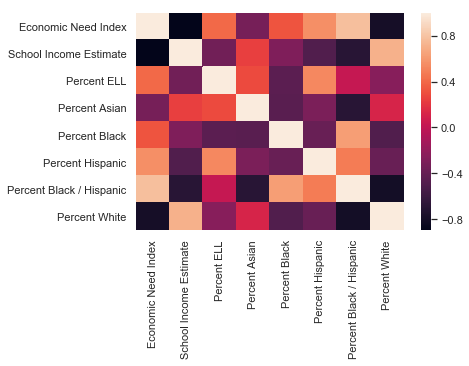

In [8]:
sns.heatmap(student_demographic.corr())

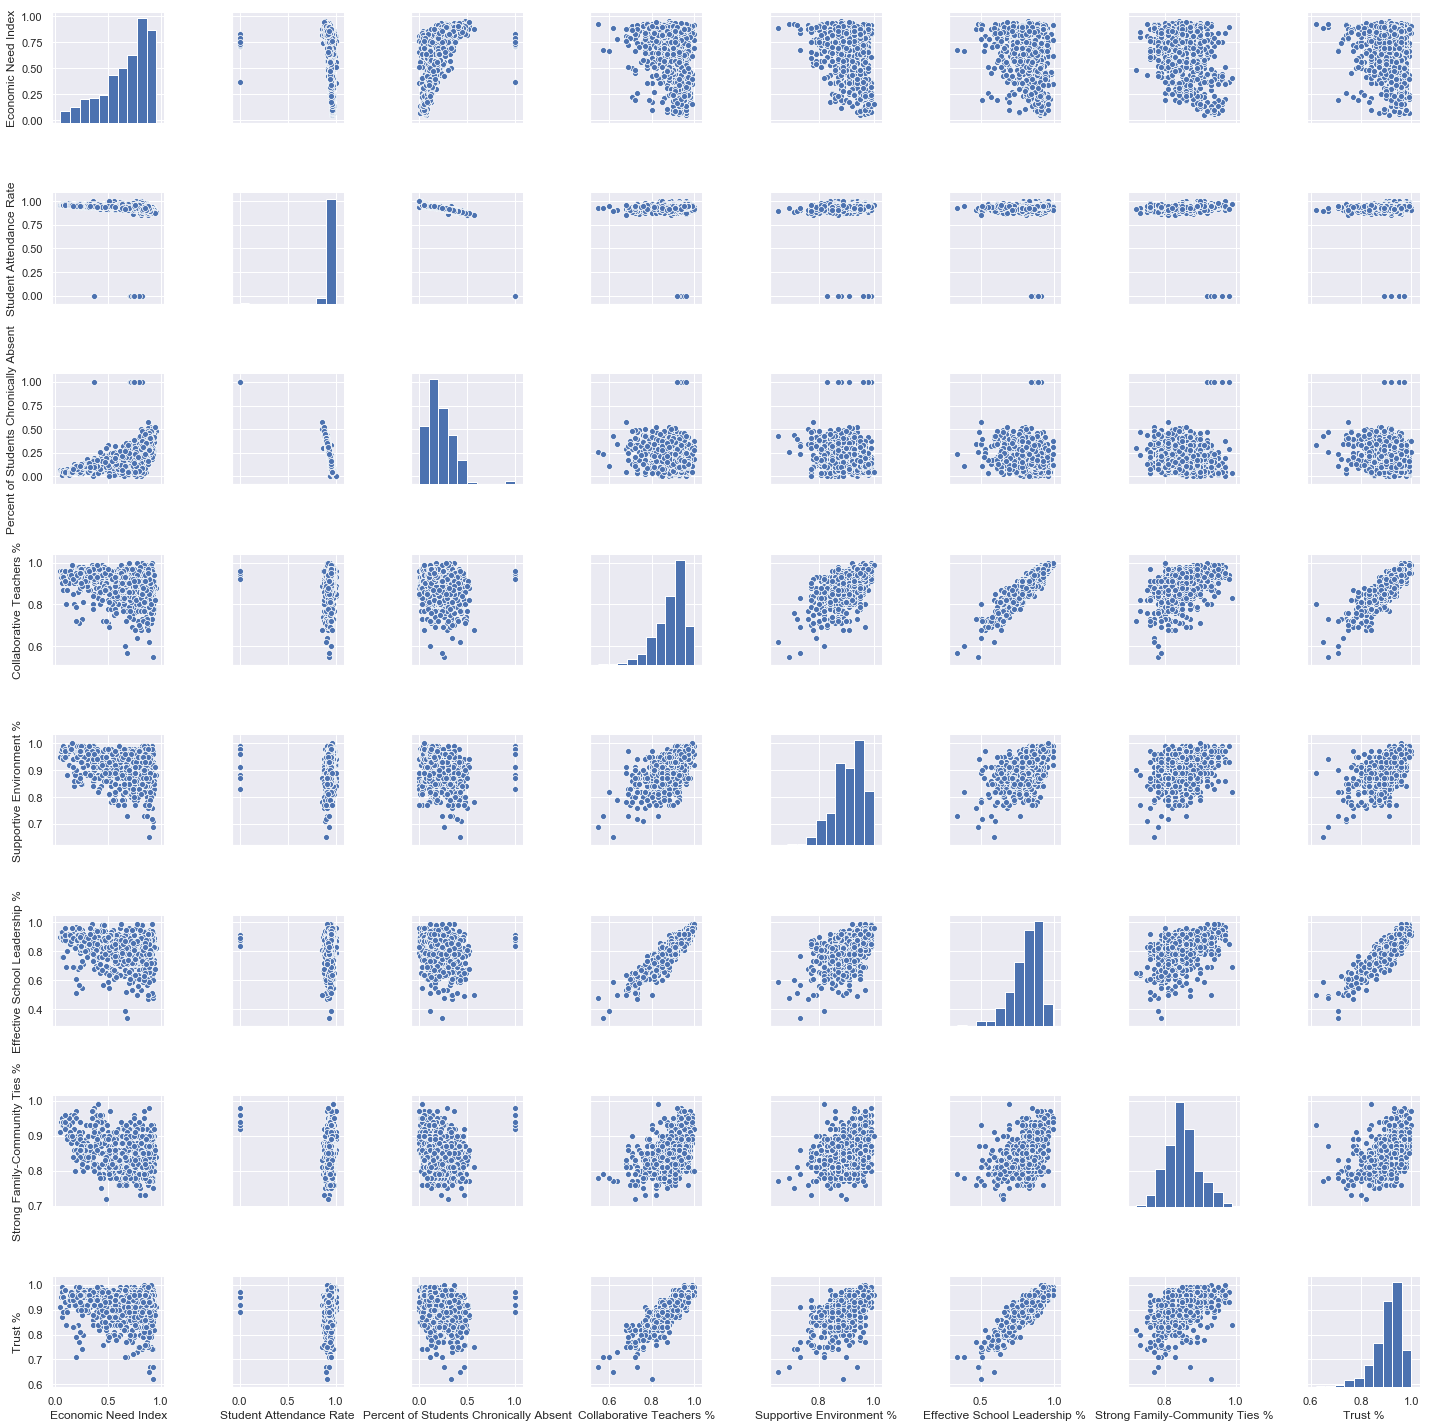

In [9]:
g = sns.pairplot(df, vars=['Economic Need Index', 'Student Attendance Rate', 'Percent of Students Chronically Absent', 'Collaborative Teachers %', 'Supportive Environment %', 'Effective School Leadership %', 'Strong Family-Community Ties %', 'Trust %'])

In [10]:
school_performance = df[['Economic Need Index', 'Student Attendance Rate', 'Percent of Students Chronically Absent', 'Rigorous Instruction %', 'Collaborative Teachers %', 'Supportive Environment %', 'Effective School Leadership %', 'Strong Family-Community Ties %', 'Trust %']]



In [11]:
school_performance.corr()

,Economic Need Index,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Collaborative Teachers %,Supportive Environment %,Effective School Leadership %,Strong Family-Community Ties %,Trust %
Economic Need Index,1.000000,-0.167136,0.576146,-0.258486,-0.239302,-0.361324,-0.231570,-0.325789,-0.184489
Student Attendance Rate,-0.167136,1.000000,-0.727669,-0.076598,-0.023205,0.043176,0.000704,-0.146726,-0.005530
Percent of Students Chronically Absent,0.576146,-0.727669,1.000000,-0.083395,-0.151693,-0.253836,-0.188152,-0.073584,-0.166858
Rigorous Instruction %,-0.258486,-0.076598,-0.083395,1.000000,0.697010,0.620126,0.597921,0.277207,0.531608
Collaborative Teachers %,-0.239302,-0.023205,-0.151693,0.697010,1.000000,0.603631,0.909218,0.417738,0.874016
Supportive Environment %,-0.361324,0.043176,-0.253836,0.620126,0.603631,1.000000,0.513351,0.307899,0.579873
Effective School Leadership %,-0.231570,0.000704,-0.188152,0.597921,0.909218,0.513351,1.000000,0.449097,0.878182
Strong Family-Community Ties %,-0.325789,-0.146726,-0.073584,0.277207,0.417738,0.307899,0.449097,1.000000,0.420896
Trust %,-0.184489,-0.005530,-0.166858,0.531608,0.874016,0.579873,0.878182,0.420896,1.000000


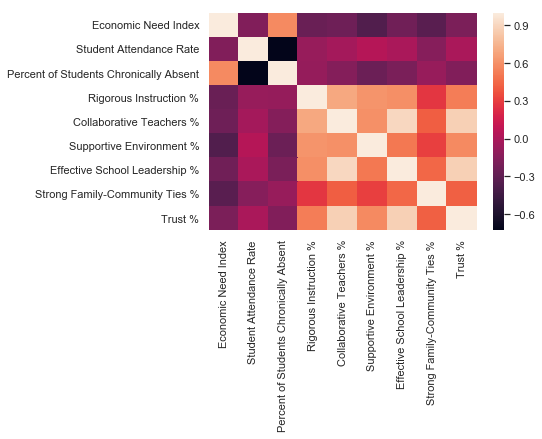

In [12]:
sns.heatmap(school_performance.corr())

In [49]:
df['School Performance Score'] = ((df['Rigorous Instruction Rating'] + df['Collaborative Teachers Rating'] + df['Supportive Environment Rating'] + df['Effective School Leadership Rating'] + df['Strong Family-Community Ties Rating'] + df['Trust Rating'] + df['Student Achievement Rating'])/7)






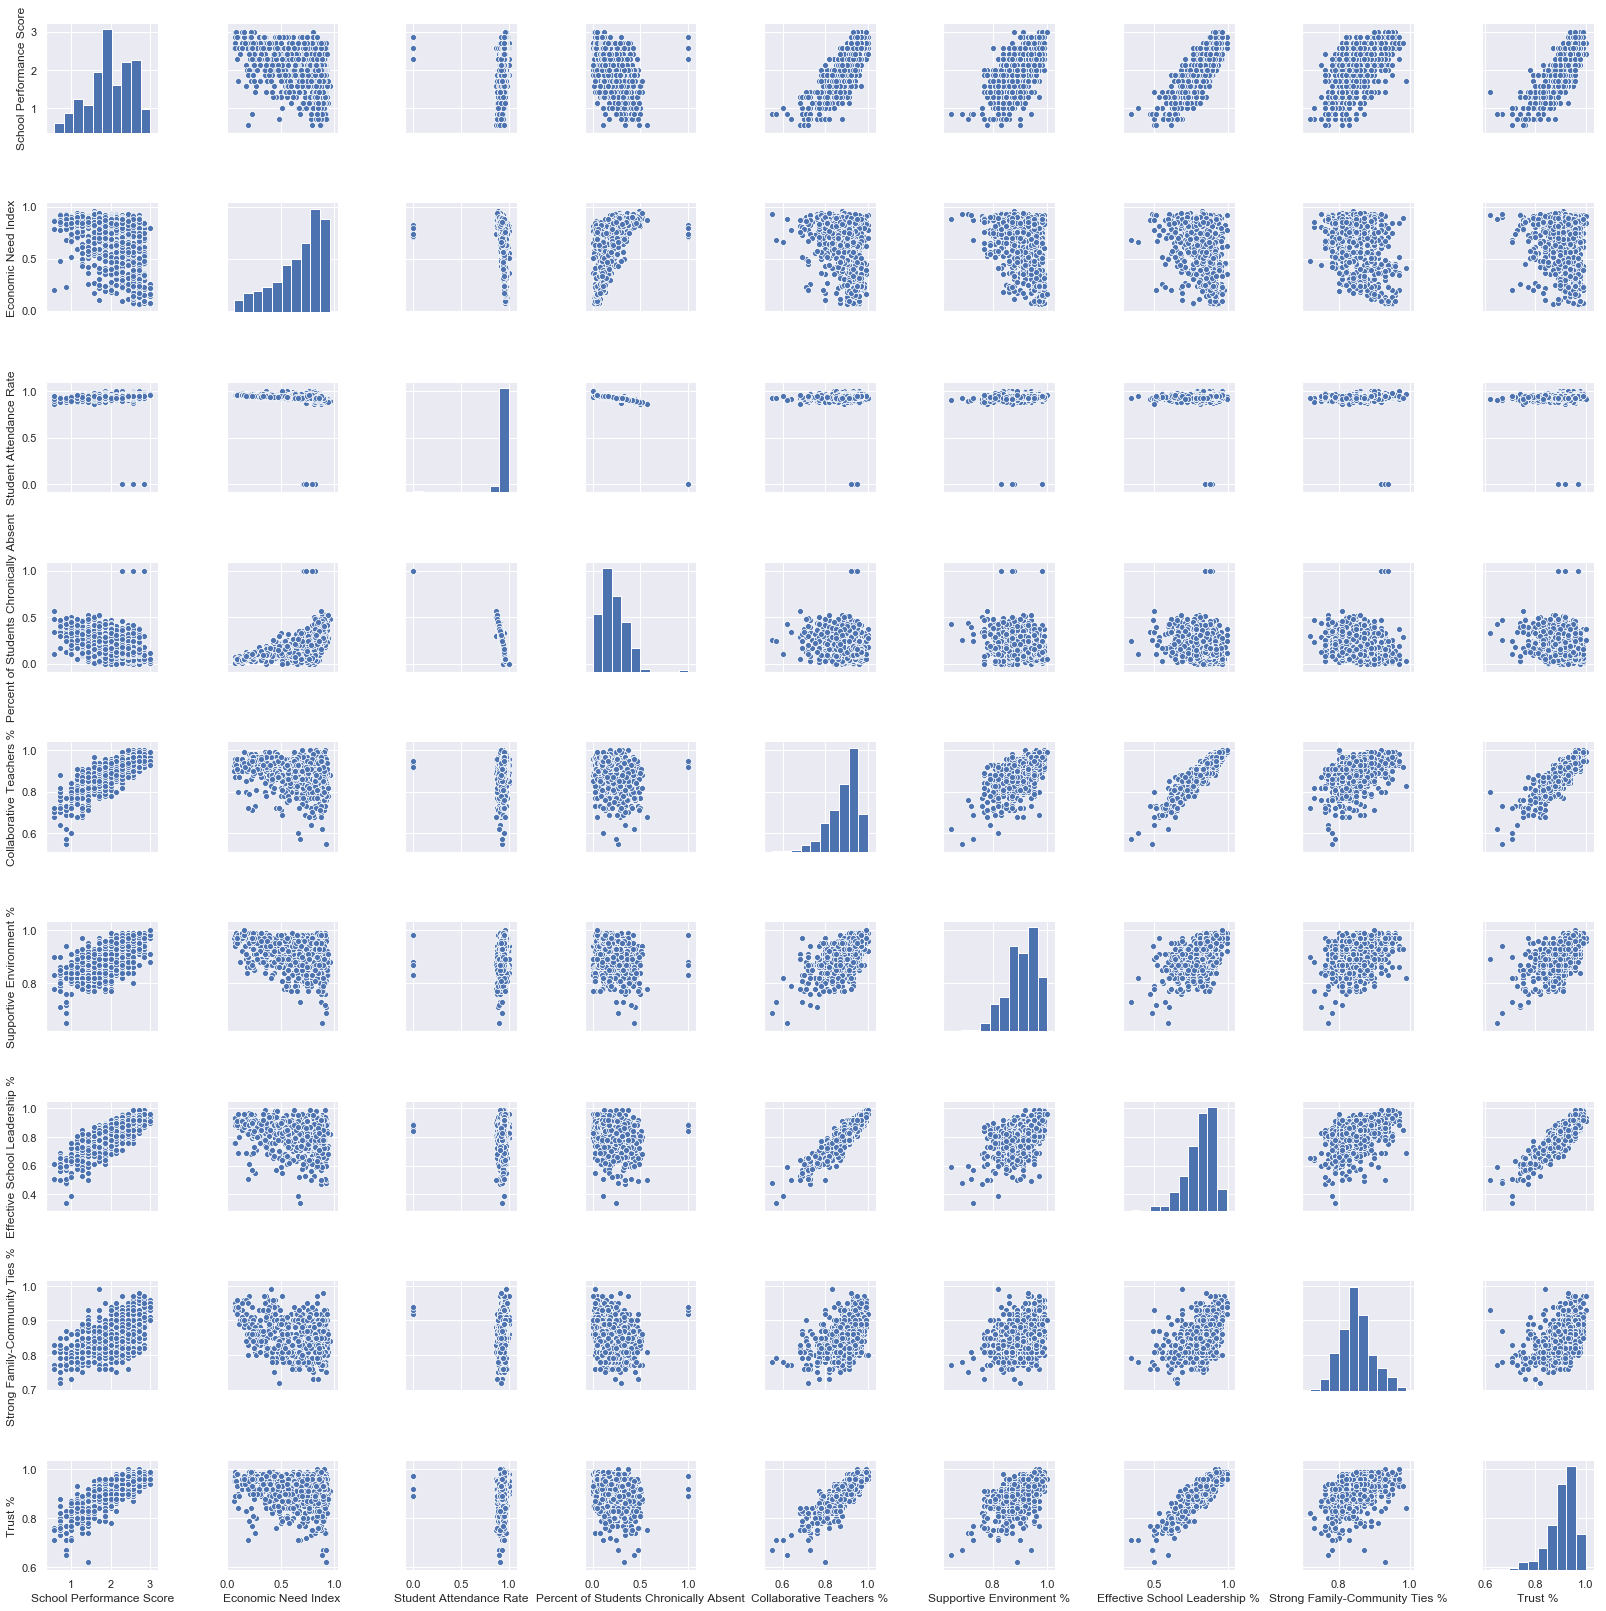

In [53]:
sns.pairplot(df, vars=['School Performance Score', 'Economic Need Index', 'Student Attendance Rate', 'Percent of Students Chronically Absent', 'Collaborative Teachers %', 'Supportive Environment %', 'Effective School Leadership %', 'Strong Family-Community Ties %', 'Trust %'])